In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\\LEARNBAY\\Project - Jan\\APril\\Classified Data",index_col=0)

In [3]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [4]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [5]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

Pre-Processing Result:
    1. No missing data
    2. No outliers
    3. No encoding required as no object datatypes
    4. Data is not imbalanced as 1 and 0 are both 500 each. 

# Spliting the data

In [8]:
x = df.drop(['TARGET CLASS'],axis=1)
y=df['TARGET CLASS']

In [ ]:
# Feature scaling is important/mandatory in SVM and KNN. 

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

# SPliting in train and test dataset. 

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.2,random_state = 217)

In [24]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 10) (800,) (200, 10) (200,)


# Model BUilding

# K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors)

In [28]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

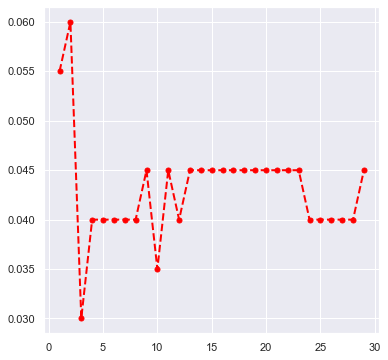

In [33]:
plt.figure(figsize=(6,6))
plt.plot(range(1,30),error_rate,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=5)

In [47]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

# Evaluting the KNN Model

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print(confusion_matrix(y_train,y_pred_knn_train))
print()
print(confusion_matrix(y_test,y_pred_knn_test))

[[385  15]
 [ 29 371]]

[[97  3]
 [ 5 95]]


In [55]:
print(classification_report(y_train,y_pred_knn_train)) 
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       400
           1       0.96      0.93      0.94       400

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [53]:
print("ACcuracy Score - KNN -Training", accuracy_score(y_train,y_pred_knn_train))
print("ACcuracy Score - KNN -Testing", accuracy_score(y_test,y_pred_knn_test))

ACcuracy Score - KNN -Training 0.945
ACcuracy Score - KNN -Testing 0.96


# KNN Mostly used for Medical purpose. 

# SUPPORT VECTOR MACHINE

kernel = linear
kernel = sigmoid
kernel = poly
kernel = rbf

In [56]:
from sklearn.svm import SVC

In [57]:
# 1. Kernel=linear

svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
y_pred_svml_train = svm_linear.predict(x_train)
y_pred_svml_test = svm_linear.predict(x_test)

In [59]:
print(confusion_matrix(y_train,y_pred_svml_train))
print(confusion_matrix(y_test,y_pred_svml_test))

[[376  24]
 [ 20 380]]
[[96  4]
 [ 3 97]]


In [60]:
print(classification_report(y_train,y_pred_svml_train))
print(classification_report(y_test,y_pred_svml_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       400
           1       0.94      0.95      0.95       400

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [63]:
print("Accuracy Score SVM Linear - Training :",accuracy_score(y_train,y_pred_svml_train))
print("Accuracy Score SVM Linear - Testing :",accuracy_score(y_test,y_pred_svml_test))

Accuracy Score SVM Linear - Training : 0.945
Accuracy Score SVM Linear - Testing : 0.965


In [74]:
# 2. kernel = sigmoid 
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [75]:
y_pred_svms_train = svm_sigmoid.predict(x_train)
y_pred_svms_test = svm_sigmoid.predict(x_test)

In [76]:
print(confusion_matrix(y_train,y_pred_svms_train))
print(confusion_matrix(y_test,y_pred_svms_test))

[[368  32]
 [ 23 377]]
[[95  5]
 [ 3 97]]


In [77]:
print(classification_report(y_train,y_pred_svms_train))
print(classification_report(y_test,y_pred_svms_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       400
           1       0.92      0.94      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.95      0.97      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [88]:
print("Accuracy Score SVM Sigmoid - Training :",accuracy_score(y_train,y_pred_svms_train))
print("Accuracy Score SVM Sigmoid - Testing :",accuracy_score(y_test,y_pred_svms_test))

Accuracy Score SVM Sigmoid - Training : 0.93125
Accuracy Score SVM Sigmoid - Testing : 0.96


In [79]:
# 3. kernel = rbf 
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)

SVC()

In [80]:
y_pred_svmr_train = svm_rbf.predict(x_train)
y_pred_svmr_test = svm_rbf.predict(x_test)

In [81]:
print(classification_report(y_train,y_pred_svmr_train))
print(classification_report(y_test,y_pred_svmr_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       400
           1       0.97      0.96      0.96       400

    accuracy                           0.96       800
   macro avg       0.97      0.97      0.96       800
weighted avg       0.97      0.96      0.96       800

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.94      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [82]:
print("Accuracy Score SVM RBF - Training :",accuracy_score(y_train,y_pred_svmr_train))
print("Accuracy Score SVM RBF - Testing :",accuracy_score(y_test,y_pred_svmr_test))

Accuracy Score SVM RBF - Training : 0.965
Accuracy Score SVM RBF - Testing : 0.95


In [83]:
# 4. kernel = poly 
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [84]:
y_pred_svmp_train = svm_poly.predict(x_train)
y_pred_svmp_test = svm_poly.predict(x_test)

In [85]:
print(confusion_matrix(y_train,y_pred_svmp_train))
print(confusion_matrix(y_test,y_pred_svmp_test))

[[382  18]
 [ 12 388]]
[[92  8]
 [ 5 95]]


In [86]:
print(classification_report(y_train,y_pred_svmp_train))
print(classification_report(y_test,y_pred_svmp_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.96      0.97      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.92      0.95      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



In [87]:
print("Accuracy Score SVM poly - Training :",accuracy_score(y_train,y_pred_svmp_train))
print("Accuracy Score SVM poly - Testing :",accuracy_score(y_test,y_pred_svmp_test))

Accuracy Score SVM poly - Training : 0.9625
Accuracy Score SVM poly - Testing : 0.935


# Naive Bayes Theorem

In [89]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred_naive_train = naive.predict(x_train)
y_pred_naive_test = naive.predict(x_test)

In [91]:
print("Accuracy Score naive - Training :",accuracy_score(y_train,y_pred_naive_train))
print("Accuracy Score naive - Testing :",accuracy_score(y_test,y_pred_naive_test))

Accuracy Score naive - Training : 0.94
Accuracy Score naive - Testing : 0.955


# DONE